# Steps

1. Get historical data for commodities.
2. Build an index for those commodities.
3. Plot a graph of the index against a commodity.

In [268]:
import tradingeconomics as te
import pandas as pd
import matplotlib.dates as md
import matplotlib.pyplot as plt

In [284]:
te.login('jupyter:jupyter'); # Signup for a free API key at https://developer.tradingeconomics.com/

In [270]:
# get historical data for metal commodities
comm_hist = te.fetchMarkets(['XAUUSD:CUR',
 'XAGUSD:CUR',
 'HG1:COM',
 'JBP:COM',
 'SCO:COM',
 'LC:COM',
 'XPTUSD:CUR',
 'TTSG:COM',
 'HRC:COM'], output_type='df')

In [271]:
# data preprocessing
raw_gold_data = comm_hist.loc[comm_hist['symbol'] == 'XAUUSD:CUR']
raw_silver_data = comm_hist.loc[comm_hist['symbol'] == 'XAGUSD:CUR']
raw_copper_data = comm_hist.loc[comm_hist['symbol'] == 'HG1:COM']
raw_steel_data = comm_hist.loc[comm_hist['symbol'] == 'JBP:COM']
raw_iron_ore_data = comm_hist.loc[comm_hist['symbol'] == 'SCO:COM']
raw_lithium_data = comm_hist.loc[comm_hist['symbol'] == 'LC:COM']
raw_platinum_data = comm_hist.loc[comm_hist['symbol'] == 'XPTUSD:CUR']
raw_titanium_data = comm_hist.loc[comm_hist['symbol'] == 'TTSG:COM']
raw_hrc_steel_data = comm_hist.loc[comm_hist['symbol'] == 'HRC:COM']



gold = raw_gold_data[['close']].rename(columns={'close': 'gold (XAUUSD:CUR)'})
silver = raw_silver_data[['close']].rename(columns={'close': 'silver (XAGUSD:CUR)'})
copper = raw_copper_data[['close']].rename(columns={'close': 'copper (HG1:COM)'})
steel = raw_steel_data[['close']].rename(columns={'close': 'steel (JBP:COM)'})
iron_ore = raw_iron_ore_data[['close']].rename(columns={'close': 'iron_ore (SCO:COM)'})
lithium = raw_lithium_data[['close']].rename(columns={'close': 'lithium (LC:COM)'})
platinum = raw_platinum_data[['close']].rename(columns={'close': 'platinum (XPTUSD:CUR)'})
titanium = raw_titanium_data[['close']].rename(columns={'close': 'titanium (TTSG:COM)'})
hrc_steel = raw_hrc_steel_data[['close']].rename(columns={'close': 'hrc_steel (HRC:COM)'})

gold.index.name = 'Date'
silver.index.name = 'Date'
copper.index.name = 'Date'
steel.index.name = 'Date'
iron_ore.index.name = 'Date'
lithium.index.name = 'Date'
platinum.index.name = 'Date'
titanium.index.name = 'Date'
hrc_steel.index.name = 'Date'

df = pd.merge(pd.merge(gold, silver, on='Date'), copper, on='Date')
df = pd.merge(pd.merge(df, steel, on='Date'),iron_ore , on='Date')
df = pd.merge(pd.merge(df, lithium, on='Date'),platinum , on='Date')
df = pd.merge(pd.merge(df, titanium, on='Date'),hrc_steel , on='Date')

In [272]:
df

,gold (XAUUSD:CUR),silver (XAGUSD:CUR),copper (HG1:COM),steel (JBP:COM),iron_ore (SCO:COM),lithium (LC:COM),platinum (XPTUSD:CUR),titanium (TTSG:COM),hrc_steel (HRC:COM)
Date,,,,,,,,,
2022-07-08,1741.82000,19.3000,3.5320,4260.0,115.0,475500.0,897.00000,13.88,917.0
2022-07-07,1739.61145,19.1930,3.5820,4220.0,114.5,475500.0,873.24260,13.88,921.0
2022-07-06,1738.30347,19.1811,3.4180,4220.0,114.5,475500.0,855.88660,13.88,923.0
2022-07-05,1764.35278,19.1925,3.4250,4220.0,114.5,475500.0,865.29860,13.88,921.0
2022-07-01,1810.18000,19.8700,3.6190,4500.0,118.0,475500.0,889.00000,13.88,930.0
2022-06-30,1806.88700,20.2465,3.7145,4501.0,122.5,475500.0,893.85430,13.88,930.0
2022-06-29,1817.10900,20.7085,3.7790,4522.0,124.5,475500.0,916.78330,13.88,945.0
2022-06-28,1819.69500,20.8371,3.7740,4436.0,124.5,477500.0,910.16010,13.88,1126.0
2022-06-27,1822.73000,21.1415,3.7790,4350.0,121.5,477500.0,908.03660,13.88,1127.0


Some commodities are not US dollar based hence they need to be changed to their US dollar value

In [275]:
# change non US dollar based commodities to US based commodities
# Get commodities data
data = te.getMarketsData(marketsField = 'commodities', output_type = 'df')
commodities_group = data.query(f'Group == "Metals"')
non_US_commodities = commodities_group[~commodities_group['unit'].str.contains("USD", regex=True)]
non_US_commodities[['Symbol', 'Name', 'Close', 'unit']]

,Symbol,Name,Close,unit
11,JBP:COM,Steel,4260.0,CNY/T
14,LC:COM,Lithium,475500.0,CNY/T


1. Loop through the non US dollar based commodities
2. If the commodity is in the metals dataframe (df)
3. 

In [276]:
# change non US dollar commodities to US dollar commodities
for item in non_US_commodities['Symbol']:
    if df.columns.str.contains(item).any():
        
        col_name = [col_name for col_name in df.columns if item in col_name]
        
        # get the base unit of the commodity
        val = non_US_commodities.loc[non_US_commodities['Symbol'] == item]
        unit = val['unit'].values[0]
        base_currency = unit.split('/')[0]
                
        # get the exchange rate
        curr_cross = te.getCurrencyCross(cross = base_currency, output_type = 'df')
        curr_pair = base_currency.upper() + 'USD'
    
        curr_usd = curr_cross.loc[curr_cross['Name'] == curr_pair]
        # if curr_usd is not empty, currency pair is referenced as base_currencyUSD 
        if len(curr_usd) != 0:

            df[col_name] = df[col_name] * curr_usd['Close'][0]

        # if curr_usd is empty, currency pair is referenced as USDbase_currency
        elif len(curr_usd) == 0:

            curr_pair = 'USD' + base_currency.upper()

            curr_usd = curr_cross.loc[curr_cross['Name'] == curr_pair]
            df[col_name] = df[col_name] / curr_usd['Close'][0]
            
df

,gold (XAUUSD:CUR),silver (XAGUSD:CUR),copper (HG1:COM),steel (JBP:COM),iron_ore (SCO:COM),lithium (LC:COM),platinum (XPTUSD:CUR),titanium (TTSG:COM),hrc_steel (HRC:COM)
Date,,,,,,,,,
2022-07-08,1741.82000,19.3000,3.5320,637.352444,115.0,71141.100256,897.00000,13.88,917.0
2022-07-07,1739.61145,19.1930,3.5820,631.367914,114.5,71141.100256,873.24260,13.88,921.0
2022-07-06,1738.30347,19.1811,3.4180,631.367914,114.5,71141.100256,855.88660,13.88,923.0
2022-07-05,1764.35278,19.1925,3.4250,631.367914,114.5,71141.100256,865.29860,13.88,921.0
2022-07-01,1810.18000,19.8700,3.6190,673.259624,118.0,71141.100256,889.00000,13.88,930.0
2022-06-30,1806.88700,20.2465,3.7145,673.409237,122.5,71141.100256,893.85430,13.88,930.0
2022-06-29,1817.10900,20.7085,3.7790,676.551115,124.5,71141.100256,916.78330,13.88,945.0
2022-06-28,1819.69500,20.8371,3.7740,663.684376,124.5,71440.326755,910.16010,13.88,1126.0
2022-06-27,1822.73000,21.1415,3.7790,650.817636,121.5,71440.326755,908.03660,13.88,1127.0


In [278]:
# calculating index divisor
# Choosing a base value for 100
base_value = 100

total_value = df.loc[dates[-1]].sum()
index_divisor = total_value / base_value
index_divisor

775.3372218908019

In [279]:
# calculate an index value for each day
commodity_index = pd.DataFrame()
for day in dates:
    days_data = df.loc[day]
    total_value = days_data.sum()
    index_value = total_value / index_divisor
    x = {
        'Date': [day],
        'index_value': [index_value]
    }
    commodity_index = pd.concat([commodity_index, pd.DataFrame(x)])

In [280]:
commodity_index = commodity_index.set_index('Date')

In [281]:
commodity_index

,index_value
Date,
2022-07-08,97.358907
2022-07-07,97.322139
2022-07-06,97.300420
2022-07-05,97.343601
2022-07-01,97.504553
2022-06-30,97.513172
2022-06-29,97.582586
2022-06-28,98.180321
2022-06-27,98.162721


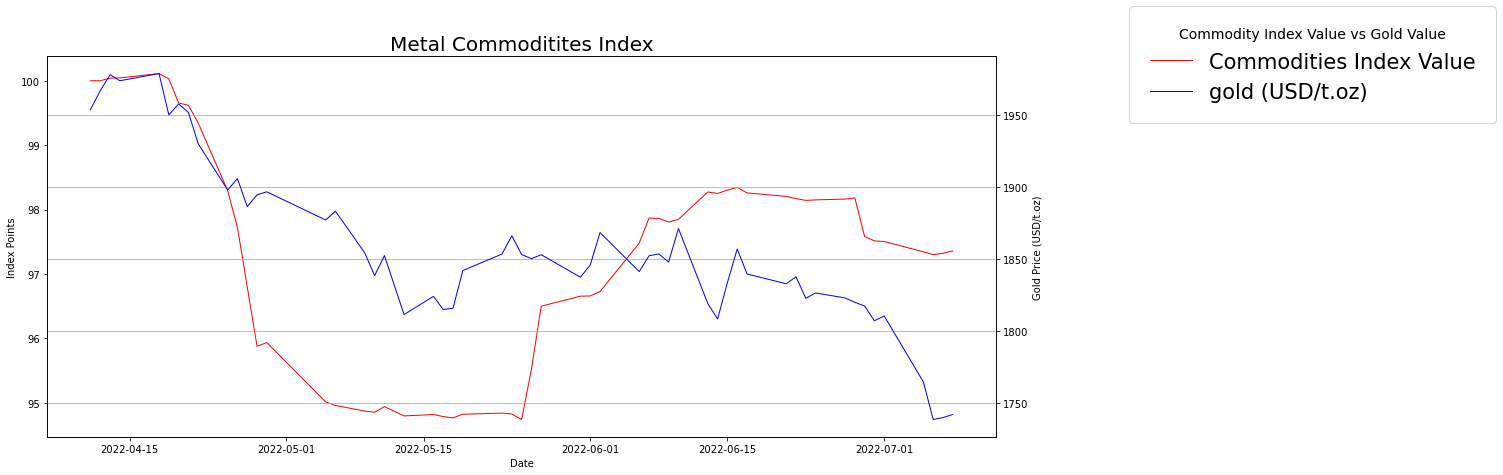

In [282]:
fig, axis_1 = plt.subplots(figsize=(17, 7))
axis_2 = axis_1.twinx()

axis_1.plot(commodity_index.index.tolist(), commodity_index['index_value'].values.tolist(), marker='', color='red', linewidth=1, label='Commodities Index Value')
axis_2.plot(df.index.tolist(), df['gold (XAUUSD:CUR)'].values.tolist(), marker='', color='blue', linewidth=1, label='gold (USD/t.oz)')
#plt.plot(df.index.tolist(), df['silver'].values.tolist(), marker='', color='red', linewidth=1, label='silver (USD/t.oz)')

# setting axis labels
axis_1.set_xlabel('Date')
axis_1.set_ylabel('Index Points')
axis_2.set_ylabel('Gold Price (USD/t.oz)')

fig.legend(
    title='Commodity Index Value vs Gold Value',
    loc='upper left',
    bbox_to_anchor=(1,0,0.5,1),
    fontsize=21,
    ncol=1,
    title_fontsize=14,
    borderpad=1)
plt.grid(True)

plt.title('Metal Commoditites Index', size=20)
plt.show()

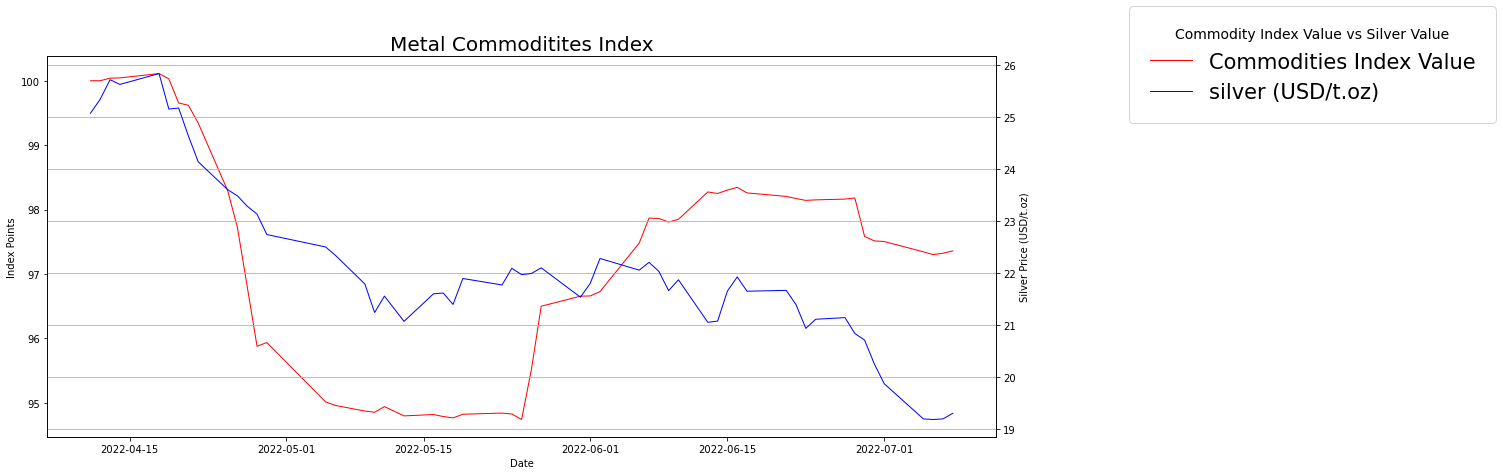

In [283]:
fig, axis_1 = plt.subplots(figsize=(17, 7))
axis_2 = axis_1.twinx()

axis_1.plot(commodity_index.index.tolist(), commodity_index['index_value'].values.tolist(), marker='', color='red', linewidth=1, label='Commodities Index Value')
axis_2.plot(df.index.tolist(), df['silver (XAGUSD:CUR)'].values.tolist(), marker='', color='blue', linewidth=1, label='silver (USD/t.oz)')
#plt.plot(df.index.tolist(), df['silver'].values.tolist(), marker='', color='red', linewidth=1, label='silver (USD/t.oz)')

# setting axis labels
axis_1.set_xlabel('Date')
axis_1.set_ylabel('Index Points')
axis_2.set_ylabel('Silver Price (USD/t.oz)')

fig.legend(
    title='Commodity Index Value vs Silver Value',
    loc='upper left',
    bbox_to_anchor=(1,0,0.5,1),
    fontsize=21,
    ncol=1,
    title_fontsize=14,
    borderpad=1)
plt.grid(True)

plt.title('Metal Commoditites Index', size=20)
plt.show()